# INFO 3402 – Class 02: Computational Thinking and Hacker Ethic

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
* Review computational thinking concepts, practices, and perspectives from INFO 1201, *etc*.
* Downloading, launching, and interacting with Jupyter Notebooks
* An exploratory data retrieval and analysis project

## Load libraries

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

import time

## Oh no, a wall of text
First a warning: we invest a **lot** of time in writing these documents with detailed narratives, examples, links to resources, etc. It is **really** important that you read, understand, and develop an expectation for what should happen before executing any cells. We often see students just auto-executing a whole notebook and wondering why things are not working.

For example, do not execute the following cell or else it will print "You should have read the instructions" and prevent anything else from executing for a long time. If you did accidently run this cell, you can go to Kernel > Interrupt to stop it. Instead, convert the block of code below from "Code" type to a "Raw NBConvert" type from the drop-down menu to prevent it from being accidentally run.

There are going to be many examples of cells you should exercise caution in running throughout the rest of the class. We will never intentionally include code that compromises the security of your computer but you should still be cautious about executing any code. 

Examples of cautious code blocks we will see in the remainder of our class include: installing a package and the code only needs to be run once, scraping data that could take minutes or hours to complete, or doing an analysis that might consume a lot of resources. 

*Please read the narratives and have some expectation for what each block of code should do before running it!*

## Computational thinking _practices_

Thinking back to examples of the *practices* of computational thinking (Brennan & Resnick 2012) from the slides:

* **Experimenting and iterating**: developing, experimenting, and developing some more
* **Testing and debugging**: making sure things work and solving problems when they arise
* **Reusing and remixing**: building on existing projects or ideas and sharing your own work
* **Abstracting and modularizing**: building something complex by putting together smaller parts

Let's see what these practices look like through an exploratory data collection and analysis exercise.

**Our goal**: Create a CSV file with the daily stock price since December 31, 2019 for each company in the [S&P 500 index](https://en.wikipedia.org/wiki/S%26P_500_Index).

We are not expecting that you already be familiar with every piece of syntax in the rest of this example, so *do not stress* that you are already behind. We are going to learn much of this in the weeks to come! However, you should be able to follow the narrative and start to develop intuitions for how pieces work.

### Step 1: Find a list of companies and ticker symbols
(**Reusing and remixing:** building on existing projects or ideas and sharing your own work)

Googling around, I found a dataset hosted by [DataHub.io](https://datahub.io/): [S&P 500 Companies with Financial Information](https://datahub.io/core/s-and-p-500-companies#data). We don't need to register for an account or anything! But the data was created 2 years ago, so it may not be up-to-date.

Option 1: Download the data to the same directory as this notebook and open it here.

In [ ]:
sp500_companies_df = pd.read_csv('constituents.csv')
sp500_companies_df.head(10)

Option 2: Read the data directly into the notebook from the web!

In [4]:
sp500_companies_df = pd.read_csv('https://datahub.io/core/s-and-p-500-companies/r/constituents.csv')
sp500_companies_df.head(10)

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care
5,ACN,Accenture plc,Information Technology
6,ATVI,Activision Blizzard,Communication Services
7,ADBE,Adobe Inc.,Information Technology
8,AAP,Advance Auto Parts,Consumer Discretionary
9,AMD,Advanced Micro Devices Inc,Information Technology


### Step 2: Find a data service that provides historical stock prices for free
(**Reusing and remixing:** building on existing projects or ideas and sharing your own work)

Googling around, I found this blog post describing the "[Best 5 free stock market APIs in 2020](https://towardsdatascience.com/best-5-free-stock-market-apis-in-2019-ad91dddec984)" so let's start there! The top choice (and one I and [others](https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836)) know from experience) relies on a library called [`yfinance`](https://github.com/ranaroussi/yfinance). I generally do not recommend installing libraries willy-nilly, but in this case, let's install a new library to let us access historical stock prices for free. 

We only need to install the library once (repeating it won't necessarily hurt) and we can do this from the command line or from within the notebook. I'm going install using the anaconda package manager.

In [5]:
# Only need to run once
! pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22411 sha256=61a34af70e58ff154b0c9913216ee1c9b6daffe2a22ada0a9d3ebd6124368efb
  Stored in directory: /Users/briankeegan/Library/Caches/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Created wheel for multitasking: filename=multitasking-0.0.9-cp37-none-any.whl size=8368 sha256=c3cce6c774ba97933fa45141809652a8f57fa7ff509ebc8431c245f40740215c
  Stored in directory: /Users/briankeegan/Library/Caches/pip/wheels/37/fa/73/d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking


Import the library.

In [6]:
import yfinance as yf

Another alternative library we could use is [`pandas-datareader`](https://github.com/pydata/pandas-datareader) ([docs](https://pydata.github.io/pandas-datareader/)). This also doesn't come standard with Anaconda, so we will need to install the library as well from either the command line or from within the notebook. Again, you should only need to do this once.

In [9]:
# Only need to run once
! conda install --yes -c anaconda pandas-datareader

Solving environment: done

## Package Plan ##

  environment location: /Users/briankeegan/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py37_0         3.0 MB  anaconda
    pandas-datareader-0.9.0    |             py_0          72 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  anaconda/noarch::pandas-datareader-0.9.0-py_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> anaconda



conda-4.8.4          | 3.0 MB    | ##################################### | 100% 
pandas-datareader-0. | 72 KB     | ##################################### | 100

Import the library.

In [10]:
import pandas_datareader as pdr

### Step 3: Write some code to retrieve the historical price data for one company
(**Experimenting and iterating**: developing, experimenting, and developing some more)

When all else fails, read the documentation. The author of the `yfinance` package has a [nice blog post](https://aroussi.com/post/python-yahoo-finance) detailing how to use it!

Ask for Apple's data from January 6 through August 17 of this year.

In [16]:
aapl_yf_df = yf.download(tickers='AAPL',
                         start='2019-12-31',
                         end='2020-08-25',
                         progress=False)

What does the resulting data look like?

In [17]:
aapl_yf_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-18,457.410004,464.000000,456.029999,462.250000,462.250000,26408400
2020-08-19,463.929993,468.649994,462.440002,462.829987,462.829987,36384500
2020-08-20,463.000000,473.570007,462.929993,473.100006,473.100006,31726800
2020-08-21,477.049988,499.470001,477.000000,497.480011,497.480011,84513700
2020-08-24,514.789978,515.140015,495.750000,503.429993,503.429993,86326400


There are [many data readers available](https://pydata.github.io/pandas-datareader/remote_data.html) with `pandas-datareader`, including (curiously) an undocumented 'yahoo' datareader. 

In [18]:
aapl_pdr_df = pdr.DataReader(name='AAPL',
                             data_source='yahoo',
                             start='2019-12-31',
                             end='2020-08-24')

aapl_pdr_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-18,464.000000,456.029999,457.410004,462.250000,26408400.0,462.250000
2020-08-19,468.649994,462.440002,463.929993,462.829987,36384500.0,462.829987
2020-08-20,473.570007,462.929993,463.000000,473.100006,31726800.0,473.100006
2020-08-21,499.470001,477.000000,477.049988,497.480011,84513700.0,497.480011
2020-08-24,515.140015,495.750000,514.789978,503.429993,86326400.0,503.429993


### Step 4: Write a loop to repeat this code for all 500 companies
(**Abstracting and modularizing**: building something complex by putting together smaller parts)

The `yfinance` library has a built-in functionality that lets it make many requests in parallel. Let's  show off this fancy functionality first.

First, get a list of all the companies' stock tickers from `sp500_companies_df` and turn it into a list using the [`.tolist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html) method that converts the data from a pandas Series data type (which non-pandas functions like `yfinance` may not recognize) into a basic list data type.

In [24]:
sp500_companies_df['Symbol'].tolist()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AAP',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP',
 'ED'

In [25]:
sp500_symbol_list = sp500_companies_df['Symbol'].tolist()
sp500_symbol_list[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AMD']

Double-check it has 500 symbols. 505? Interesting, someone should get to the bottom of that.

In [26]:
len(sp500_symbol_list)

505

Pass the list of companies to the `download` function specific to the `yfinance` library.

In [27]:
all_df = yf.download(sp500_symbol_list,interval='1d',start='2019-12-31',end='2020-08-25')

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


This special functionality that takes a list of multiple symbols (in this case 505) is special and not what you would do 99% of the time: take each symbol, use the function to get its data, store this data in some structure, and move on to the next symbol. This takes much longer that the previous (special) approach but I've illustrated it below since it's much closer to how this works in most cases.

In [29]:
# Initialize an empty dictionary where we will store results
all_data_dict = {}

# Loop through each symbol 
for i,symbol in enumerate(sp500_symbol_list):
    
    # Get the data for that symbol, sil
    _df = yf.download(symbol,interval='1d',start='2019-12-31',end='2020-08-25',progress=False)
    
    # Could use the pandas-datareader function instead
    #aapl_pdr_df = pdr.DataReader(symbol,data_source='yahoo',start='2019-12-31',end='2020-08-17')
    
    # Store the data in the dictionary
    all_data_dict[symbol] = _df
    
    # It's common courtesy to wait a bit in between each request to avoid overwhelming a system
    time.sleep(.1)
    
    # Print out where we are in the process, every 50th symbol
    if i%50 == 0:
        print(i,symbol)

0 MMM
50 ANET

1 Failed download:
- BRK.B: No data found, symbol may be delisted

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted
100 CVX
150 DPZ
200 FOXA
250 IP
300 MMC
350 ODFL
400 ROST
450 TFC
500 YUM


### Step 5: Write code to combine all this data together into one structure
(**Testing and debugging**: making sure things work and solving problems when they arise)

Using the magic `yfinance.download` function, we have a giant DataFrame with a [multi-index](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) column.

In [30]:
all_df.head()

Adj Close                                                \
                    A        AAL         AAP        AAPL       ABBV   
Date                                                                  
2019-12-31  84.915131  28.574404  159.156250  291.638000  85.038094   
2020-01-02  85.552170  28.982893  158.410934  298.292145  86.008141   
2020-01-03  84.178558  27.548195  158.420868  295.392120  85.191757   
2020-01-06  84.427406  27.219410  155.817291  297.745880  85.864067   
2020-01-07  84.686203  27.119778  153.968964  296.345581  85.374245   

                                                                      ...  \
                  ABC        ABMD        ABT         ACN        ADBE  ...   
Date                                                                  ...   
2019-12-31  83.879753  170.589996  85.796867  208.054611  329.809998  ...   
2020-01-02  83.938957  168.809998  85.885757  207.639603  334.429993  ...   
2020-01-03  82.883308  166.820007  84.838737  207.293793  331.809998  ...   
2020-01-06  84.096809  179.039993  85.283234  205.940170  333.709991  ...   
2020-01-07  83.494980  180.350006  84.809113  201.493912  333.390015  ...   

               Volume                                                         \
                 XLNX         XOM       XRAY        XRX       XYL        YUM   
Date                                                                           
2019-12-31  1672400.0  13151800.0  1211000.0  1380100.0  492000.0  1271000.0   
2020-01-02  3234100.0  12456400.0  1556600.0  1581300.0  869500.0  1369900.0   
2020-01-03  3521900.0  17386900.0   910000.0  1042600.0  795100.0  1145500.0   
2020-01-06  2832700.0  20081900.0   751000.0  1199200.0  817300.0  1454100.0   
2020-01-07  3050000.0  17387700.0   792600.0  1533100.0  662200.0  1388600.0   

                                                       
                  ZBH      ZBRA       ZION        ZTS  
Date                                                   
2019-12-31   612400.0  363500.0  1246900.0  1128600.0  
2020-01-02  1052400.0  387800.0  1528700.0  1576700.0  
2020-01-03   963500.0  305300.0  1215800.0  1274000.0  
2020-01-06   944100.0  322600.0  1217500.0  2334100.0  
2020-01-07   907300.0  236300.0  1450900.0  1224500.0  

[5 rows x 3030 columns]

It's hard to see all those column values. We can access them with the `.columns.levels` attribute.

In [31]:
all_df.columns.levels[0]

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [32]:
all_df.columns.levels[1]

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       ...
       'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=505)

We can access the "Adj Close" values by treating it like a dictionary. The rows are days and the columns are the company symbols.

In [33]:
all_df['Adj Close'].head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,84.915131,28.574404,159.156250,291.638000,85.038094,83.879753,170.589996,85.796867,208.054611,329.809998,...,96.567528,66.178360,56.296658,35.797119,78.234093,99.272713,148.998215,255.440002,50.462605,131.760803
2020-01-02,85.552170,28.982893,158.410934,298.292145,86.008141,83.938957,168.809998,85.885757,207.639603,334.429993,...,100.399811,67.240555,56.634895,35.855373,79.286613,100.691872,148.520401,259.140015,50.968010,133.542831
2020-01-03,84.178558,27.548195,158.420868,295.392120,85.191757,82.883308,166.820007,84.838737,207.293793,331.809998,...,98.088585,66.699974,56.008160,35.389343,79.753304,100.376495,148.132172,256.049988,50.248787,133.562759
2020-01-06,84.427406,27.219410,155.817291,297.745880,85.864067,84.096809,179.039993,85.283234,205.940170,333.709991,...,96.044044,67.212105,56.316555,34.855347,79.236969,100.317375,147.276093,258.010010,49.636467,132.537338
2020-01-07,84.686203,27.119778,153.968964,296.345581,85.374245,83.494980,180.350006,84.809113,201.493912,333.390015,...,98.236748,66.662033,56.614998,34.903889,78.939087,100.494774,147.146683,256.470001,49.335167,132.985321


If we used the loop strategy, then the data is parked inside the `all_data_dict`. We can use the [`concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function in pandas to combine them all.

In [34]:
concat_df = pd.concat(all_data_dict)
concat_df.head()

Open        High         Low       Close   Adj Close  \
    Date                                                                     
MMM 2019-12-31  175.229996  176.589996  175.070007  176.419998  171.558121   
    2020-01-02  177.679993  180.009995  177.139999  180.000000  175.039474   
    2020-01-03  177.020004  178.660004  175.630005  178.449997  173.532181   
    2020-01-06  177.149994  178.710007  176.350006  178.619995  173.697495   
    2020-01-07  178.279999  178.509995  176.820007  177.899994  172.997330   

                   Volume  
    Date                   
MMM 2019-12-31  1573500.0  
    2020-01-02  3601700.0  
    2020-01-03  2466900.0  
    2020-01-06  1998000.0  
    2020-01-07  2173000.0

This returns a multi-index on the index with both symbol and date and then the values for that stock on each day as columns. I like the simpler dates as rows and symbols as columns approach from above. We can access a single column of `concat_df` with bracket notation and then [`unstack`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unstack.html?highlight=unstack#pandas.Series.unstack) the multi-indexed Series into a DataFrame.

In [35]:
adjclose_concat_s = concat_df['Adj Close']

# Inspect
adjclose_concat_s.head()

     Date      
MMM  2019-12-31    171.558121
     2020-01-02    175.039474
     2020-01-03    173.532181
     2020-01-06    173.697495
     2020-01-07    172.997330
Name: Adj Close, dtype: float64

Unstack the multi-indexed series into a DataFrame.

In [36]:
adjclose_concat_df = adjclose_concat_s.unstack(0)

# Inspect
adjclose_concat_df.head()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,171.558121,46.907528,85.796867,85.038094,170.589996,208.054611,59.031757,329.809998,159.156250,45.860001,...,137.714386,62.664635,35.797119,96.567528,78.234093,99.272713,255.440002,148.998215,50.462605,131.760803
2020-01-02,175.039474,47.035530,85.885757,86.008141,168.809998,207.639603,58.266792,334.429993,158.410934,49.099998,...,142.405029,61.569065,35.855373,100.399811,79.286613,100.691872,259.140015,148.520401,50.968010,133.542831
2020-01-03,173.532181,46.621986,84.838737,85.191757,166.820007,207.293793,58.286655,331.809998,158.420868,48.599998,...,140.292755,61.865166,35.389343,98.088585,79.753304,100.376495,256.049988,148.132172,50.248787,133.562759
2020-01-06,173.697495,46.917377,85.283234,85.864067,179.039993,205.940170,59.349670,333.709991,155.817291,48.389999,...,140.015091,61.776337,34.855347,96.044044,79.236969,100.317375,258.010010,147.276093,49.636467,132.537338
2020-01-07,172.997330,46.602295,84.809113,85.374245,180.350006,201.493912,59.945747,333.390015,153.968964,48.250000,...,140.679504,61.648026,34.903889,98.236748,78.939087,100.494774,256.470001,147.146683,49.335167,132.985321


### Step 6: Write to disk
(**Reusing and remixing**: building on existing projects or ideas and sharing your own work)

We have done all this hard work, now save the results to disk so you can just load them instead of crawling the data again as a CSV file. This file you could then give to someone else who could open in a spreadsheet program like Excel. Character encoding errors are a huge pain to deal with, so I also make sure to explicitly encode my data to disk with the common UTF-8 standard.

In [38]:
all_df.to_csv('sp500_constituents_2020.csv',encoding='utf8')

### Step 7: Do some exploratory analyses on all this data
(**Experimenting and iterating**: developing, experimenting, and developing some more)

There's a lot of variance in the prices of the S\&P 500 constituents: some stocks are only \\$10 per share while others are in excess of \\$1,000 per share. We could explore these values with a [histogram](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

In [40]:
adjclose_concat_df.loc['2019-12-31']

MMM     171.558121
AOS      46.907528
ABT      85.796867
ABBV     85.038094
ABMD    170.589996
           ...    
YUM      99.272713
ZBRA    255.440002
ZBH     148.998215
ZION     50.462605
ZTS     131.760803
Name: 2019-12-31 00:00:00, Length: 503, dtype: float64

Text(0, 0.5, 'Number of symbols')

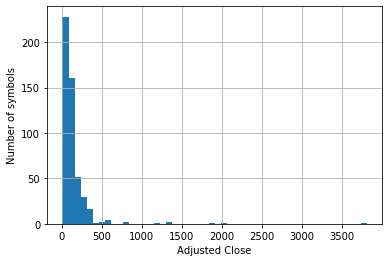

In [41]:
# Get all the prices  on December 31 by accessing the row using the .loc
dec31_prices = adjclose_concat_df.loc['2019-12-31']

# Make the histogram on these data
ax = dec31_prices.hist(bins=50)

# Always label your axes!
ax.set_xlabel('Adjusted Close')
ax.set_ylabel('Number of symbols')

What are these low and high values?

In [42]:
dec31_prices.sort_values().head(10)

F        9.144482
AMCR    10.589470
COTY    11.128141
GE      11.132238
CTL     12.628797
FCX     13.071515
MRO     13.516185
NWSA    14.000552
HBI     14.292505
NWS     14.371678
Name: 2019-12-31 00:00:00, dtype: float64

In [43]:
dec31_prices.sort_values().tail(10)

MTD       793.280029
CMG       837.109985
AZO      1191.310059
GOOG     1337.020020
GOOGL    1339.390015
AMZN     1847.839966
BKNG     2053.729980
NVR      3808.409912
CARR             NaN
OTIS             NaN
Name: 2019-12-31 00:00:00, dtype: float64

The presence of a few outlier values skews the histogram. This large range of values is perfect to illustrate on a logarithmic scale, which calls for [logarithmic bins](https://stackoverflow.com/a/6856155/1574687).

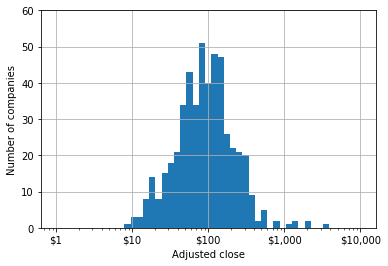

In [44]:
ax = adjclose_concat_df.loc['2019-12-31'].hist(bins=np.logspace(0,4,50))
ax.set_xscale('log')
ax.set_ylim((0,60))
ax.set_xlabel('Adjusted close')
ax.set_ylabel('Number of companies')

# https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.StrMethodFormatter
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

The COVID-19 pandemic and resulting shutdowns caused a historic crash and recovery in the stock market in 2020. Let's visualize the daily prices of each constituent stock over time. Given that there is so much variance in the prices of these stocks, let's normalize their prices to 1 on December 31.

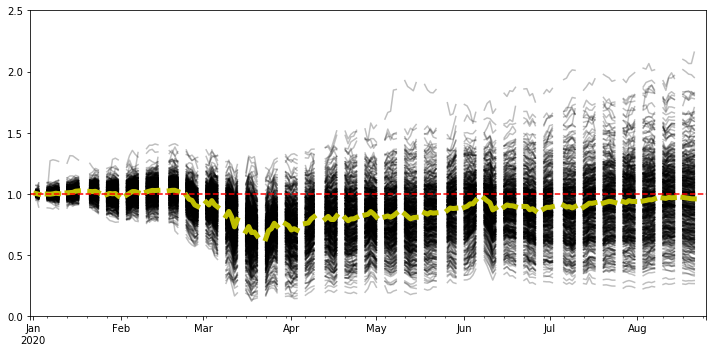

In [45]:
# Normalize by dividing the values by their Dec 31 values
norm_adjclose_concat_df = adjclose_concat_df.div(adjclose_concat_df.loc['2019-12-31'])

# The data doesn't include weekends, holidays, and other days when the markets are closed
# Reindex the data to include all dates since the 31st to make a cleaner axis
norm_adjclose_concat_df = norm_adjclose_concat_df.reindex(pd.date_range('2019-12-31','2020-08-25'))

# Plot the data
ax = norm_adjclose_concat_df.plot(c='k',alpha=.25,legend=False,figsize=(10,5))

# Include a consistent range of y-values
ax.set_ylim((0,2.5))

# Include a yellow line with the average
norm_adjclose_concat_df.mean(axis=1).plot(ax=ax,c='y',lw=5)

# Include a red dashed line at 1 as a baseline
ax.axhline(y=1,ls='--',c='r')

# Save the picture
plt.tight_layout()
plt.savefig('sp500_prices_normalized_2020.png',dpi=300)

We can see the crash in March when stock prices fell by almost 50% since the start of the year and the sustained rise since then as stimulus measures injected cash and liquidity into the economy. The gaps in the data are the days when the market was closed.

The stock market has (surprisingly, to me) almost recovered all its losses. Some stocks have performed amazingly well, nearly doubling in value since January, while others remain really depressed and only a quarter of their original value.

We can compute the ratio between the most recent and the December 31 values.

In [54]:
ratio_s = adjclose_concat_df.loc['2020-08-24']/adjclose_concat_df.loc['2019-12-31']

What are some of the higher and lowest ratios? Travel companies like Norwegian Cruise Lines (NCLH), Carnival Cruise Lines (CCL), and United Airlines (UAL); oil extractors like Occidental Petroleum (OXY); and luxury brand owner Coty (COTY).

In [55]:
ratio_s.sort_values().head()

NCLH    0.286595
CCL     0.321235
OXY     0.340713
COTY    0.358550
FTI     0.377186
dtype: float64

Some of the best performers are e-commerce firms like Paypal (PYPL), chip makers like NVIDIA (NVDA), and pharmaceurical and medical device makers like Abiomed (ABMD), West Pharmaceuticals (WST), and Dexcom (DXCM).

In [56]:
ratio_s.dropna().sort_values().tail()

WST     1.798442
AMD     1.811601
PYPL    1.838587
DXCM    1.932843
NVDA    2.164669
dtype: float64

Visualize as a histogram to reveal that most companies are near their values at the start of the year.

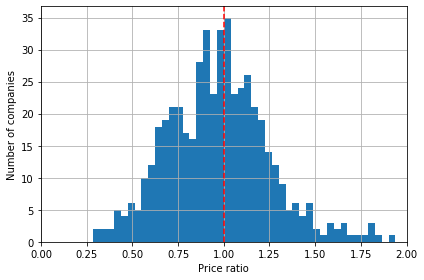

In [57]:
ax = ratio_s.hist(bins=50)
ax.set_xlim((0,2))
ax.axvline(1,c='r',ls='--')
ax.set_xlabel('Price ratio')
ax.set_ylabel('Number of companies')

plt.tight_layout()
plt.savefig('sp500_price_ratio_2020.png',dpi=300)

## Computational thinking _perspectives_

Thinking back to examples of the *perspectives* of computational thinking (Brennan & Resnick 2012) from the slides:

* **Expressing**: computation as a medium for creative and critical expression
* **Connecting**: computation as a tool for of creating for and interacting with others
* **Questioning**: computation as a tool for investigating how the world works

What could we do next now that we have this data and these exploratory findings? 

What are other ways that we could use this notebook, these data, and these results to pursue creative or critical questions (**expressing**)? 

How could we share these findings, who else could be interested in using these data and results, and how could we get it to them (**connecting**)?

What do these data and results reveal about the disconnects between reactions of the stock market and the experiences of most Americans? What other kinds of data or analyses would we need to explore this (**questioning**)? 

Let's talk about these in lecture together!